# Unsupervised Machine Learning with Airbnb

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns

In [ ]:
# set grey layout with white grid for all plots
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('ggplot')
ggplot_styles = {'axes.facecolor': '8d8d8d',} 
plt.rcParams.update(ggplot_styles)

In [ ]:
url = 'https://github.com/fivethirtyeight/uber-tlc-foil-response/blob/master/uber-trip-data/uber-raw-data-jun14.csv?raw=true'

data = pd.read_csv(url)

Check dataset

In [ ]:
data.head(10)

,Date/Time,Lat,Lon,Base
348280,6/13/2014 19:00:00,40.6936,-73.9560,B02617
156470,6/15/2014 13:56:00,40.7355,-74.0037,B02598
532688,6/11/2014 20:39:00,40.7070,-74.0137,B02682
90217,6/7/2014 21:44:00,40.7051,-74.0100,B02598
103242,6/9/2014 16:14:00,40.7601,-73.9717,B02598
525545,6/10/2014 21:49:00,40.6633,-73.9779,B02682
137978,6/13/2014 9:15:00,40.7157,-73.9408,B02598
283254,6/3/2014 2:48:00,40.7124,-73.7802,B02617
382426,6/19/2014 17:38:00,40.7131,-74.0094,B02617
484022,6/4/2014 22:25:00,40.7198,-74.0071,B02682


In [ ]:
data.shape

(66384, 4)

Sample dataset to 10% to make modeling easier

In [ ]:
data = data.sample(frac=.1, axis=0, random_state=0)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66384 entries, 348280 to 4012
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date/Time  66384 non-null  object 
 1   Lat        66384 non-null  float64
 2   Lon        66384 non-null  float64
 3   Base       66384 non-null  object 
dtypes: float64(2), object(2)
memory usage: 2.5+ MB


## Data cleaning & EDA

In [ ]:
data.isna().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

In [ ]:
num_data = data.select_dtypes(exclude=['object'])
num_data

,Lat,Lon
348280,40.6936,-73.9560
156470,40.7355,-74.0037
532688,40.7070,-74.0137
90217,40.7051,-74.0100
103242,40.7601,-73.9717
...,...,...
258226,40.7230,-74.0032
470420,40.7510,-73.9869
575523,40.7602,-73.9788
161597,40.6984,-73.9086


Check data distribution in both columns

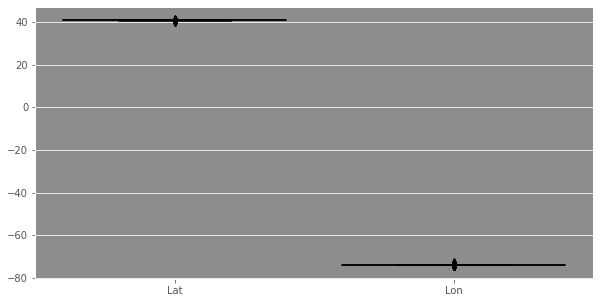

In [ ]:
sns.boxplot(data=num_data, color='black')
plt.show()

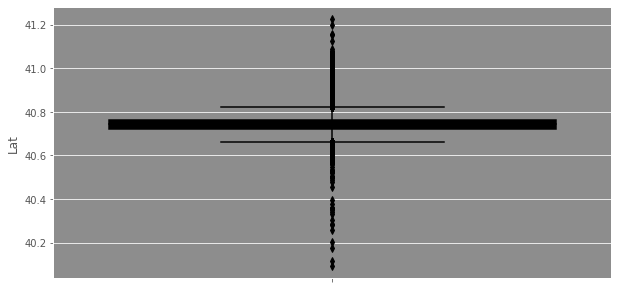

In [ ]:
sns.boxplot(y='Lat', data=data, color='black')

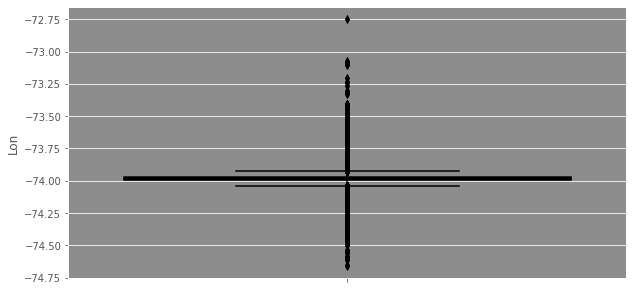

In [ ]:
sns.boxplot(y='Lon', data=data, color='black')

Scatter plot of clean data 

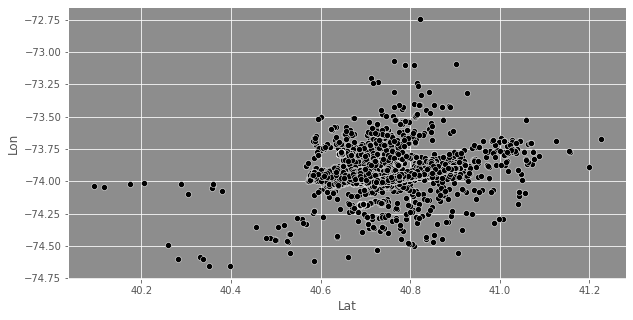

In [ ]:
sns.scatterplot(data=data, x='Lat', y='Lon', color='black')
plt.show()

There are clustering tendencies in the dataset, let's build clustering models to identify these clusters.

## Data prep for modeling

In [ ]:
# convert datetime column to datetime format
data['Date/Time'] = pd.to_datetime(data['Date/Time'])

In [ ]:
# add hour and weekday columns to my dataframe
data['Hour'] = data['Date/Time'].dt.hour
data['Weekday'] = data['Date/Time'].dt.day_name()

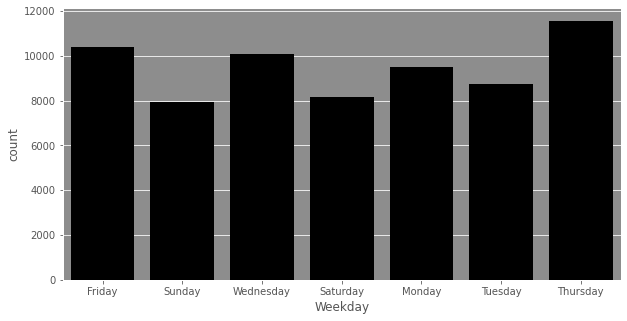

In [ ]:
# check datapoints distribution by weekdays
sns.countplot(x='Weekday', data=data, color='black')
plt.show()

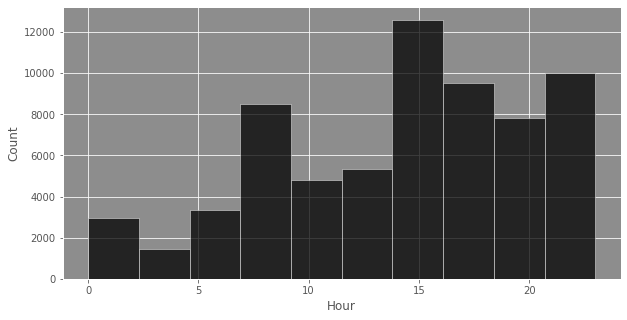

In [ ]:
# check datapoints distribution by hour
sns.histplot(data=data, x='Hour', color='black', bins=10)
plt.show()

## Modeling

Assign modeling variables to X

In [ ]:
X=data[['Lat','Lon']]

### Clustering with KMeans

In [ ]:
#Creation of loop to find the right cluster
from sklearn.cluster import KMeans

dict_kmeans={}
dict_model={}
for i in range (2,5):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    key="kmeans"+str(i)
    dict_kmeans[key] = kmeans.labels_
    dict_model[key] = kmeans.labels_

In [ ]:
dict_kmeans

{'kmeans2': array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
 'kmeans3': array([2, 2, 2, ..., 0, 0, 0], dtype=int32),
 'kmeans4': array([0, 0, 0, ..., 3, 0, 3], dtype=int32)}

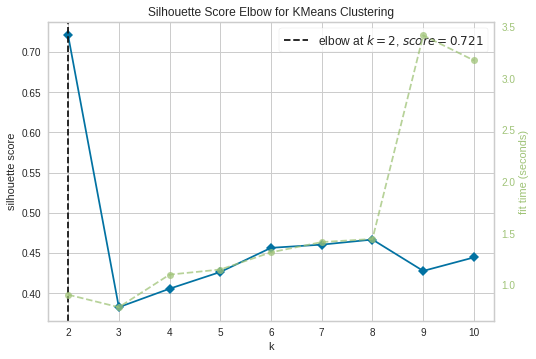

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()

visualizer = KElbowVisualizer(estimator = kmeans, k = (2,11), metric='silhouette')
visualizer.fit(X)
visualizer.poof()

Elbow indicates an optimal number of clusters of 2 with a silhouette score of 0.721.

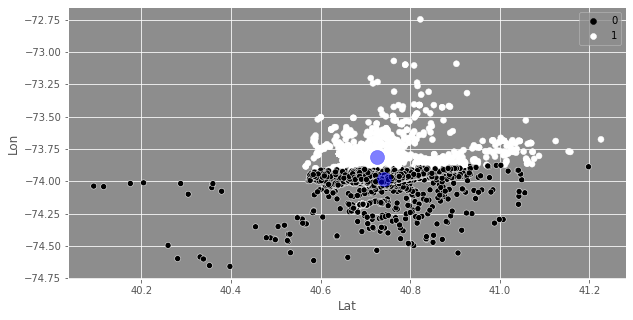

In [ ]:
# fitting KMeans with 2 clusters
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X) #y-pred

data['kmeans_cluster'] = kmeans.labels_
k_centers = kmeans.cluster_centers_

# plot clusters on dataset plot
fig, ax = plt.subplots()
sns.scatterplot(data=data, x='Lat', y='Lon', hue=y_kmeans, palette=['black', 'white'], ax=ax)
#sns.scatterplot(x=k_centers[:, 0], y=k_centers[:, 1], palette='blue', size=200, ax=ax)
plt.scatter(k_centers[:, 0], k_centers[:, 1], c='blue', s=200, alpha=0.5)
plt.show()

### Clustering with DBScan

In [ ]:
# 


In [ ]:
eps=[0.02, 0.15, 0.18, 0.1]
min_samples=[2, 4, 4, 2]
k=0
for i,j in zip(eps, min_samples):
    k=k+1
    print(i)
    print(j)
    dbs = DBSCAN(eps=i, min_samples=j)
    dbs.fit(X)
    key2="db"+str(k)
    dict_kmeans[key2] = dbs.labels_

### Clustering WITH SpectralClustering

In [ ]:
# find the optimal numbers of clusters with SpectralClustering
from sklearn.cluster import SpectralClustering

dict_sc={}
for i in range (2,11):
    SC = SpectralClustering(n_clusters=2, assign_labels='discretize',random_state=0)
    SC.fit(X)
    key="SC"+str(i)
    dict_sc[key] = SC.labels_

dict_sc

###  Clustering WITH GAUSSIAN MIXTURE MODEL

In [ ]:
# find the optimal numbers of clusters with GAUSSIAN
from sklearn.mixture import GaussianMixture


dict_gmm={}
for i in range (2,5):
    gmm = GaussianMixture(n_components=i)
    gmm.fit(X)
    key="gmm"+str(i)
    dict_gmm[key] = gmm.predict(X)
    dict_model[key] = gmm.predict(X)

dict_gmm


{'gmm2': array([1, 0, 0, ..., 0, 1, 0]),
 'gmm3': array([0, 1, 1, ..., 1, 2, 1]),
 'gmm4': array([1, 0, 0, ..., 0, 3, 0])}

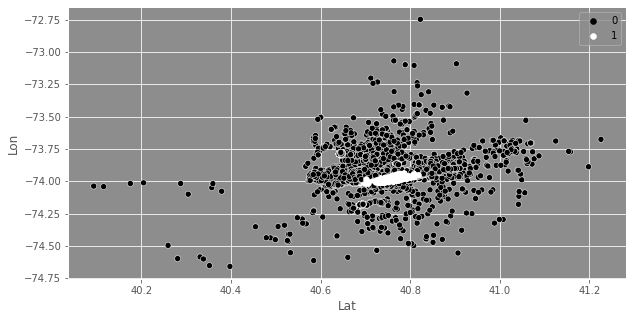

In [ ]:
# Fitting Gaussian with 2 clusters
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2)
gmm.fit(X)
y_gmm = gmm.predict(X)

data['gmm_cluster'] = gmm.predict(X)

# plot clusters on dataset plot
fig, ax = plt.subplots()
sns.scatterplot(data=data, x='Lat', y='Lon', hue=y_gmm, palette=['black', 'white'], ax=ax)
plt.show()

## Clustering with AgglomerativeClustering

In [ ]:
# find the optimal numbers of clusters for AC
from sklearn.cluster import AgglomerativeClustering

agc_dict={}
for i in range (2,4):
    agc = AgglomerativeClustering(n_clusters=i)
    agc.fit(X)
    key1="agc"+str(i)
    agc_dict[key1] = agc.labels_

agc_dict

In [ ]:

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

In [ ]:
#AGGLOMEATIVECLUSTERING
from sklearn.cluster import AgglomerativeClustering

agc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  #3: so only 3 label
agc.fit_predict(data_scaled)
y_agglomerative=agc.labels_


plt.figure(figsize=(10, 7))  
plt.scatter(data['X1'], data['X2'], c=y_agglomerative,  cmap='viridis') 
plt.xlabel("X1X1")
plt.ylabel("X2X2")

## Model Comparison

In [ ]:
def unsupervised_metrics(X, y_pred):
    """
    Function to evaluate models based on different metrics:
    Homogeneity, Completeness, V-measure, adjusted_rand, AMI, 
    Silhouette Coefficient, Variance Ratio Criterion, Fowlkes Mallows
    
    """
    from sklearn import metrics
    from sklearn.metrics import silhouette_score, calinski_harabasz_score

    score_ss = metrics.silhouette_score(X, y_pred)
    score_vrc = metrics.calinski_harabasz_score(X, y_pred)
    
    print("Silhouette Coefficient: %0.3f" % score_ss)
    print('Variance Ratio Criterion: %0.3f' % score_vrc)


In [ ]:
for key in dict_model:
    print('\n', key)
    unsupervised_metrics(X=X, y_pred=dict_model[key])


 kmeans2
Silhouette Coefficient: 0.721
Variance Ratio Criterion: 42310.248

 kmeans3
Silhouette Coefficient: 0.383
Variance Ratio Criterion: 37200.881

 kmeans4
Silhouette Coefficient: 0.406
Variance Ratio Criterion: 38930.954

 gmm2
Silhouette Coefficient: 0.523
Variance Ratio Criterion: 11963.945

 gmm3
Silhouette Coefficient: 0.395
Variance Ratio Criterion: 9383.165

 gmm4
Silhouette Coefficient: 0.422
Variance Ratio Criterion: 10042.536


## Cluster analysis

In [ ]:
# check cluster distribution
data['kmeans_cluster'].value_counts()

0    62026
1     4358
Name: kmeans_cluster, dtype: int64

In [ ]:
# assign cluster variables
cluster0 = data[data['kmeans_cluster']==0]
cluster1 = data[data['kmeans_cluster']==1]

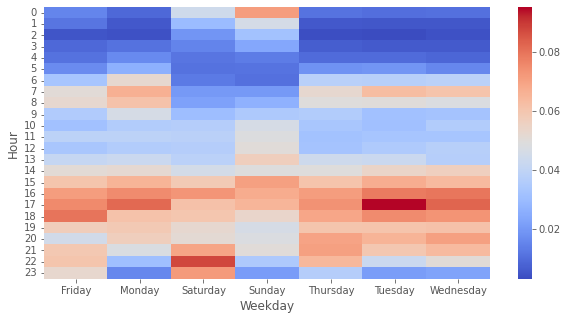

In [ ]:
# Plot pickup peaks for cluster1
sns.heatmap(pd.crosstab(cluster0.Hour, cluster0.Weekday, normalize='columns'), cmap='coolwarm')
plt.show()

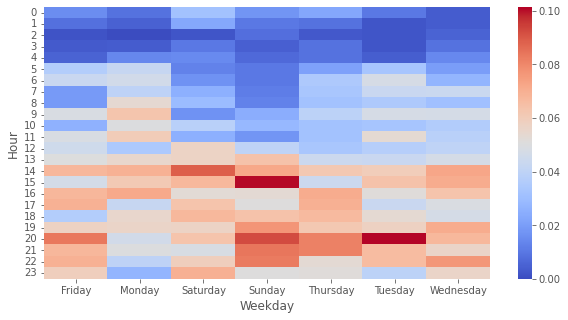

In [ ]:
# Plot pickup peaks for cluster1
sns.heatmap(pd.crosstab(cluster1.Hour, cluster1.Weekday, normalize='columns'), cmap='coolwarm')
plt.show()

## Vizualise data on a map

In [ ]:
k_centers

array([[ 40.74108429, -73.98561056],
       [ 40.72494758, -73.81506047]])

In [ ]:
k_centers_df = pd.DataFrame(data=k_centers, columns=['Lat', 'Lon'])
k_centers_df

,Lat,Lon
0,40.741084,-73.985611
1,40.724948,-73.815060


In [ ]:
import folium

uber_map = folium.Map(tiles='Stamen Toner', zoom_start=13, prefer_canvas=True)

def plotDot(point):
    '''input: series that contains a numeric named latitude and a numeric named longitude
    this function creates a CircleMarker and adds it to uber_map'''
    folium.CircleMarker(location=[point.Lat, point.Lon],
                        fill_color='blue',
                        radius=20,
                        weight=5).add_to(uber_map)

#use df.apply(,axis=1) to "iterate" through every row in your dataframe
k_centers_df.apply(plotDot, axis = 1)

#Set the zoom to the maximum possible
uber_map.fit_bounds(uber_map.get_bounds())

uber_map

In [ ]:
# export cluster map
uber_map.save('uber_map.html')